# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Reyhan Vivaldi Adrian
- **Email:** reyhan.vivaldi@ui.ac.id
- **ID Dicoding:** reyhan_vivaldi

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling laris sepanjang masa?
- Bagaimana revenue perbulan di tahun 2018?

## Import Semua Packages/Library yang Digunakan

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


## Data Wrangling

### Gathering Data

In [277]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [278]:
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [279]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [280]:
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [281]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [282]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [283]:
product_category_name_translation_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [284]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [285]:
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Data Info

In [286]:
list_df_name = ["Customer", "Geolocation", "Order Items", "Order Payments", "Order Reviews", "Orders", "Product Category", "Products", "Sellers"]
list_df = [customers_df, geolocation_df, order_items_df, order_payments_df, order_reviews_df, orders_df, product_category_name_translation_df, products_df, sellers_df]
for df in list_df:
    print(df.info())
    print(" ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

Terdapat beberapa kesalahan data type pada dataframe:
- order_items_df pada atribut `shipping_limit_date`
- order_reviews_df pada atribut `review_creation_date` dan `review_answer_timestamp`
- orders_df pada atribut `order_purchase_timestamp`, `order_approved_at`,`order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`

Semua atribut di atas bertipe objek. Seharusnya, semua atribut di atas bertipe datetime.

Kesalahan ini akan diproses pada tahap Cleaning Data.

#### Cek Data Null

In [287]:
for i in range (0, len(list_df)):
    print(f'Jumlah null data {list_df_name[i]}')
    print(list_df[i].isnull().sum())
    print(" ")

Jumlah null data Customer
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
 
Jumlah null data Geolocation
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
 
Jumlah null data Order Items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
 
Jumlah null data Order Payments
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
 
Jumlah null data Order Reviews
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_c

In [288]:
missing_values_order_reviews = order_reviews_df.isnull().sum()

missing_values_orders = orders_df.isnull().sum()

missing_values_products = products_df.isnull().sum()

total_rows_order_reviews = len(order_reviews_df)
total_rows_orders = len(orders_df)
total_rows_products = len(products_df)

percentage_missing_order_reviews = (missing_values_order_reviews/total_rows_order_reviews) * 100
percentage_missing_orders = (missing_values_orders/total_rows_orders) * 100
percentage_missing_products = (missing_values_products/total_rows_products) * 100

print("Persentase missing value order_reviews_df:")
print(percentage_missing_order_reviews)
print("\nPersentase missing value orders_df:")
print(percentage_missing_orders)
print("\nPersentase missing value products_df:")
print(percentage_missing_products)

Persentase missing value order_reviews_df:
review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

Persentase missing value orders_df:
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

Persentase missing value products_df:
product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm     

Dapat dilihat bahwa data Order Reviews, Orders, dan Products memiliki banyak null values pada beberapa atributnya, selain itu data lain tidak ada null values. Selanjutnya akan diproses di bagian Cleaning Data.

#### Cek Data Duplikat

In [289]:
print("Berikut jumlah data duplikat pada dataset, ")
for i in range (0, len(list_df)):
    print(f'-> {list_df_name[i]}: {list_df[i].duplicated().sum()}')

Berikut jumlah data duplikat pada dataset, 
-> Customer: 0
-> Geolocation: 261831
-> Order Items: 0
-> Order Payments: 0
-> Order Reviews: 0
-> Orders: 0
-> Product Category: 0
-> Products: 0
-> Sellers: 0


Terlihat bahwa data Geolocation memiliki banyak duplikasi yang selanjutnya akan diproses pada tahap Cleaning Data.

In [290]:
print("Berikut deskripsi setiap dataset, ")
for i in range (0, len(list_df)):
    print(f'-> {list_df_name[i].upper()}')
    print(f'{list_df[i].describe()}\n')

Berikut deskripsi setiap dataset, 
-> CUSTOMER
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

-> GEOLOCATION
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

-> ORDER ITEMS
       order

### Cleaning Data

#### Mengubah Data Type yang Salah

In [291]:
# order_items_df
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

# order_reviews_df
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

# orders_df
datetime_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in datetime_cols:
    orders_df[col] = pd.to_datetime(orders_df[col])

#### Handle Missing Values

Missing values pada `order_reviews_df`
- review_comment_title:       87656 (88,34%)
- review_comment_message:     58247 (58,70%)

Karena tidak ada missing values pada atribut review_score, kita simpulkan bahwa customer memberikan review score tapi tidak memberikan komentar. Dengan demikian, kita bisa isi missing value dengan "Tidak ada komentar".


In [292]:
order_reviews_df['review_comment_title'].fillna(value="Tidak ada komentar", inplace=True)
order_reviews_df['review_comment_message'].fillna(value="Tidak ada komentar", inplace=True)

Missing values pada `orders_df`
- order_approved_at:                 160 (0.16%)
- order_delivered_carrier_date:     1783 (1.79%)
- order_delivered_customer_date:    2965 (2.98%)

Data missing value pada `orders_df` terbilang kecil, sehingga bisa di drop.

In [293]:
orders_df.dropna(inplace=True)

Missing values pada `products_df`
- product_category_name         610 (1.85%)
- product_name_lenght           610 (1.85%)
- product_description_lenght    610 (1.85%)
- product_photos_qty            610 (1.85%)
- product_weight_g                2 (0.006%)
- product_length_cm               2 (0.006%)
- product_height_cm               2 (0.006%)
- product_width_cm                2 (0.006%)

Kita bisa drop atribut yang memiliki missing values 2. Untuk atribut lain, kita perlu cek lebih lanjut.

In [294]:
missing_category = products_df['product_category_name'].isna()
missing_name = products_df['product_name_lenght'].isna()
missing_description = products_df['product_description_lenght'].isna()
missing_photos = products_df['product_photos_qty'].isna()

product_missing_category = products_df[missing_category]
product_missing_name = products_df[missing_name]
product_missing_description = products_df[missing_description]
product_missing_photos = products_df[missing_photos]

if (product_missing_category.equals(product_missing_name) and
    product_missing_name.equals(product_missing_description) and
    product_missing_description.equals(product_missing_photos)):
    print("Keempat DataFrame memiliki data yang sama")
else:
    print("Keempat DataFrame memiliki data yang berbeda")

Keempat DataFrame memiliki data yang sama


Artinya, memang terdapat 610 produk yang hanya didaftarkan tapi sama-sama tidak memiliki atribut-atribut krusial. Kita bisa drop data ini.

In [295]:
products_df.dropna(inplace=True)

#### Handle Data Duplikat

In [296]:
duplicate_rows_orders = geolocation_df[geolocation_df.duplicated()]
print("\nData duplikat dalam orders_df:")
duplicate_rows_orders


Data duplikat dalam orders_df:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [297]:
geolocation_df['geolocation_city'].value_counts()

geolocation_city
sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: count, Length: 8011, dtype: int64

Kita bisa mengabaikan data duplikat pada Geolocation, karena kemungkinan duplikasi terjadi karena memang setiap data yang tergolong duplikat itu berada dalam kawasan yang sama. Sehingga, geolocation_city, dan atribut terkait lainnya bisa memiliki nilai yang sama pada sebagian data.

## Exploratory Data Analysis (EDA)

### Explore Order Items dan Products

In [298]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [299]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [300]:
orderitems_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    left_on='product_id',
    right_on='product_id'
)

orderitems_products_df = pd.merge(
    left=orderitems_products_df,
    right=product_category_name_translation_df,
    left_on='product_category_name',
    right_on='product_category_name'
)

orderitems_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [301]:
orderitems_products_df['product_category_name_english'].value_counts()

product_category_name_english
bed_bath_table               11115
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
arts_and_craftmanship           24
cds_dvds_musicals               14
la_cuisine                      14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64

### Explore Orders dan Payment

In [302]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [303]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [304]:
orders_and_payments_df = pd.merge(
    left=orders_df,
    right=order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
orders_and_payments_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


In [305]:
mask_year_2018 = orders_and_payments_df['order_approved_at'].dt.year == 2018
orders_and_payments_2018_df = orders_and_payments_df[mask_year_2018]
orders_and_payments_2018_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,credit_card,1.0,28.62
14,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18,1.0,boleto,1.0,50.13
15,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,1.0,credit_card,3.0,32.70


In [306]:
orders_and_payments_2018_df['month'] = orders_and_payments_2018_df['order_approved_at'].dt.month
orders_and_payments_2018_df.head()

/var/folders/_n/p0nzxf417h1553nl934880100000gn/T/ipykernel_1847/3355409291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_and_payments_2018_df['month'] = orders_and_payments_2018_df['order_approved_at'].dt.month


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,month
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,7
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,8
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,credit_card,1.0,28.62,2
14,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18,1.0,boleto,1.0,50.13,6
15,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,1.0,credit_card,3.0,32.70,7


In [307]:
payment_per_month = orders_and_payments_2018_df.groupby('month')['payment_value'].sum()
payment_per_month

month
1    1070104.34
2     958751.12
3    1132507.46
4    1109605.18
5    1155401.72
6    1015117.69
7    1005997.18
8    1013978.14
Name: payment_value, dtype: float64

In [308]:
mask_month_after_august = orders_and_payments_2018_df['order_approved_at'].dt.month > 8
orders_and_payments_2018_df[mask_month_after_august]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,month


### Merging to all_df

In [309]:
orders_all_df = pd.merge(
    left=orders_and_payments_df,
    right=order_reviews_df,
    left_on='order_id',
    right_on='order_id'
)

In [310]:
orders_all_df = pd.merge(
    left=orders_all_df,
    right=orderitems_products_df,
    left_on='order_id',
    right_on='order_id'
)

In [311]:
orders_all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113191,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,credit_card,...,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
113192,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,credit_card,...,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
113193,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,credit_card,...,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
113194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,credit_card,...,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [312]:
orders_all_df = pd.merge(
    left=orders_all_df,
    right=customers_df,
    left_on='customer_id',
    right_on='customer_id'
)

In [313]:
orders_all_df = pd.merge(
    left=orders_all_df,
    right=sellers_df,
    left_on='seller_id',
    right_on='seller_id'
)

In [319]:
all_data = orders_all_df
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113196 entries, 0 to 113195
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113196 non-null  object        
 1   customer_id                    113196 non-null  object        
 2   order_status                   113196 non-null  object        
 3   order_purchase_timestamp       113196 non-null  datetime64[ns]
 4   order_approved_at              113196 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113196 non-null  datetime64[ns]
 6   order_delivered_customer_date  113196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113196 non-null  datetime64[ns]
 8   payment_sequential             113193 non-null  float64       
 9   payment_type                   113193 non-null  object        
 10  payment_installments           113193 non-null  float64       
 11  

In [320]:
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang paling laris sepanjang masa?

In [314]:
category_counts = orderitems_products_df['product_category_name_english'].value_counts().head(10)
category_counts

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: count, dtype: int64

/var/folders/_n/p0nzxf417h1553nl934880100000gn/T/ipykernel_1847/1187973188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette=palette)


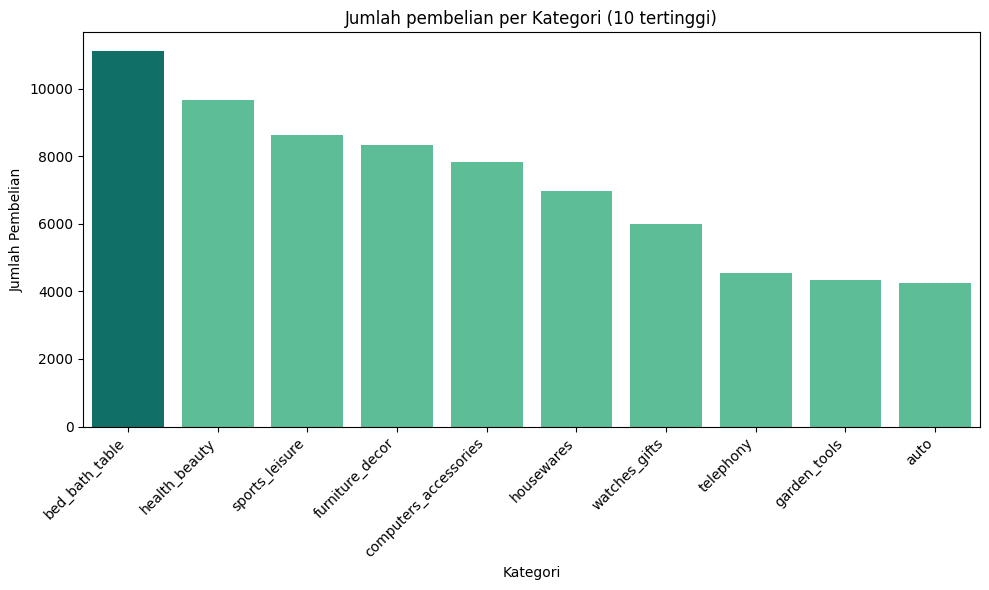

In [315]:
palette = ['#4CCD99' if count < category_counts.max() else '#007F73' for count in category_counts]

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette=palette)
plt.title('Jumlah pembelian per Kategori (10 tertinggi)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dari diagram di atas, kita bisa simpulkan bahwa kategori produk terlaris adalah bed_bath_table.

### Pertanyaan 2: Bagaimana total payment perbulan di tahun 2018?

In [316]:
payment_per_month

month
1    1070104.34
2     958751.12
3    1132507.46
4    1109605.18
5    1155401.72
6    1015117.69
7    1005997.18
8    1013978.14
Name: payment_value, dtype: float64

In [317]:
payment_per_month_converted = {calendar.month_name[month]: value for month, value in payment_per_month.items()}
payment_per_month_converted

{'January': 1070104.34,
 'February': 958751.12,
 'March': 1132507.46,
 'April': 1109605.18,
 'May': 1155401.72,
 'June': 1015117.69,
 'July': 1005997.18,
 'August': 1013978.14}

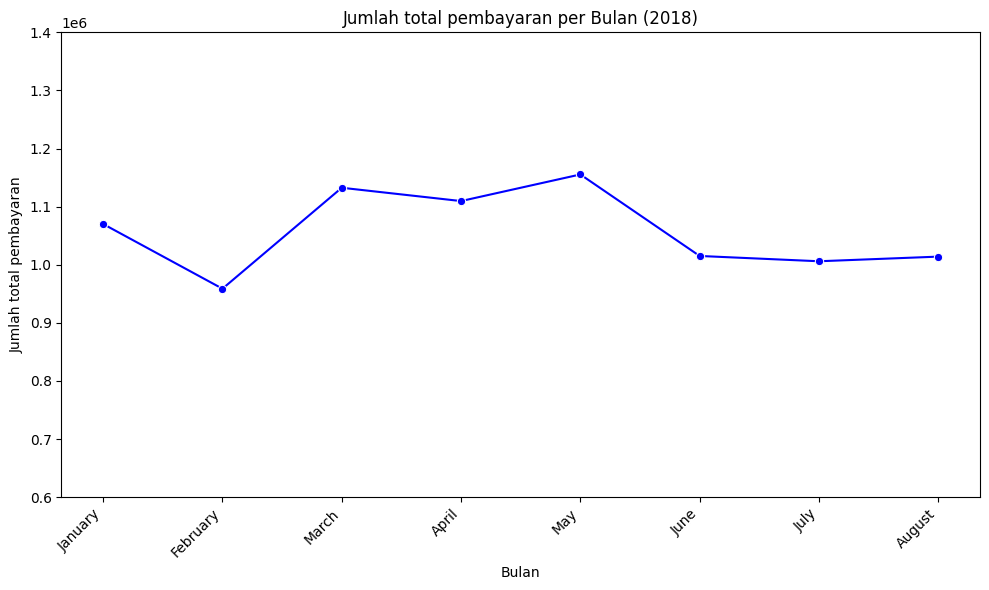

In [318]:
bulan = list(payment_per_month_converted.keys())
jumlah_pembelian = list(payment_per_month_converted.values())

# Plotting line chart menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=bulan, y=jumlah_pembelian, marker='o', color='blue')
plt.title('Jumlah total pembayaran per Bulan (2018)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah total pembayaran')

plt.ylim(bottom=6e5, top=1.4e6 )

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Berdasarkan diagram di atas, kita bisa simpulkan bahwa jumlah pembayaran yang terjadi terbilang cukup stabil. Namun, dapat dilihat juga bahwa pada bulan Februari dan Juni, terdapat penurunan yang cukup signifikan.

## Conclusion

- Kategori produk terlaris sepanjang masa adalah bed_bath_table. Ini dapat berimpilikasi pada fokus kegiatan pemasaran yang dapat lebih fokus pada kategori bed_bath_table dan kategori lain yang jumlah pembeliannya serupa. Selain itu, platform perlu mempromosikan kategori yang tidak begitu laris dengan lebih efektif.
- Jumlah pembayaran yang terjadi terbilang cukup stabil. Namun, terdapat penurunan pada bulan Februari dan bulan Juni. Nilai pembayaran pada bulan Maret, April, dan Mei lebih tinggi dari bulan-bulan lain.